In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt


In [66]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/vkcbm292'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

X_axis = 'n_hiddens'
X_axis_name = 'Number of Hidden Units'

In [67]:
runs

<Runs maximes_crew/S3_SHD_runs>

In [68]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    n_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    best_valid_acc = summary.get('best valid acc')

    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'n_hiddens': n_hiddens,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'best_valid_acc': best_valid_acc
        })



In [69]:
data

[{'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9447601010101008},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9436947601010102},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9410511363636362},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9471275252525252},
 {'n_layers': 3,
  'n_hiddens': 4096,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9519018308080808},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9497316919191918},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.941327335858586},
 {'n_layers': 3,
  'n_hiddens': 2048,
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 1,
  'best_valid_acc': 0.9441

In [71]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by n_layers and lr, then compute the mean of best_valid_acc for each group
df_grouped = df.groupby([X_axis, 'lr', 'dt_min', 'dt_max']).agg({'best_valid_acc': 'mean'}).reset_index()

df_grouped = df.groupby([X_axis, 'lr', 'dt_min', 'dt_max']).agg({'best_valid_acc': ['mean', 'std']}).reset_index()
df_grouped.columns = [X_axis, 'lr', 'dt_min', 'dt_max', 'best_valid_acc_mean', 'best_valid_acc_std']


# Now, group by n_layers and take the maximum of these averages
idx = df_grouped.groupby(X_axis)['best_valid_acc_mean'].idxmax()
df_final = df_grouped.loc[idx].reset_index(drop=True)

df_final['upper_band'] = df_final['best_valid_acc_mean'] + df_final['best_valid_acc_std']
df_final['lower_band'] = df_final['best_valid_acc_mean'] -  df_final['best_valid_acc_std']

In [72]:
df_grouped

,n_hiddens,lr,dt_min,dt_max,best_valid_acc_mean,best_valid_acc_std
0,64,0.005,0.01,0.4,0.925726,0.008228
1,64,0.005,0.01,0.7,0.919105,0.005253
2,64,0.005,0.01,1.0,0.920021,0.007355
3,64,0.005,0.10,0.4,0.919381,0.002995
4,64,0.005,0.10,0.7,0.921157,0.007933
...,...,...,...,...,...,...
79,4096,0.010,0.01,0.7,0.942511,0.004127
80,4096,0.010,0.01,1.0,0.945068,0.006168
81,4096,0.010,0.10,0.4,0.944902,0.005299
82,4096,0.010,0.10,0.7,0.943837,0.003293


In [73]:
df_final

,n_hiddens,lr,dt_min,dt_max,best_valid_acc_mean,best_valid_acc_std,upper_band,lower_band
0,64,0.005,0.01,0.4,0.925726,0.008228,0.933954,0.917498
1,128,0.010,0.01,1.0,0.938013,0.006949,0.944962,0.931064
2,256,0.005,0.01,0.7,0.943379,0.004664,0.948043,0.938715
3,512,0.005,0.01,1.0,0.949408,0.005299,0.954708,0.944109
4,1024,0.005,0.01,0.7,0.945833,0.006236,0.952069,0.939598
5,2048,0.010,0.01,1.0,0.946157,0.003445,0.949602,0.942712
6,4096,0.005,0.01,1.0,0.945707,0.004093,0.949800,0.941614


In [74]:
# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/1r2u8jsk'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

In [75]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    n_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    # dt_min = config.get('dt_min')
    # dt_max = config.get('dt_max')
    best_valid_acc = summary.get('best valid acc')

    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'n_hiddens': n_hiddens,
            'lr': lr,
            # 'dt_min': dt_min,
            # 'dt_max': dt_max,
            'best_valid_acc': best_valid_acc
        })



In [76]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by n_layers and lr, then compute the mean of best_valid_acc for each group
df_grouped = df.groupby([X_axis, 'lr']).agg({'best_valid_acc': 'mean'}).reset_index()

df_grouped = df.groupby([X_axis, 'lr']).agg({'best_valid_acc': ['mean', 'std']}).reset_index()
df_grouped.columns = [X_axis, 'lr', 'best_valid_acc_mean', 'best_valid_acc_std']


# Now, group by n_layers and take the maximum of these averages
idx = df_grouped.groupby(X_axis)['best_valid_acc_mean'].idxmax()
df_radlif = df_grouped.loc[idx].reset_index(drop=True)

df_radlif['upper_band'] = df_radlif['best_valid_acc_mean'] + df_radlif['best_valid_acc_std']
df_radlif['lower_band'] = df_radlif['best_valid_acc_mean'] -  df_radlif['best_valid_acc_std']

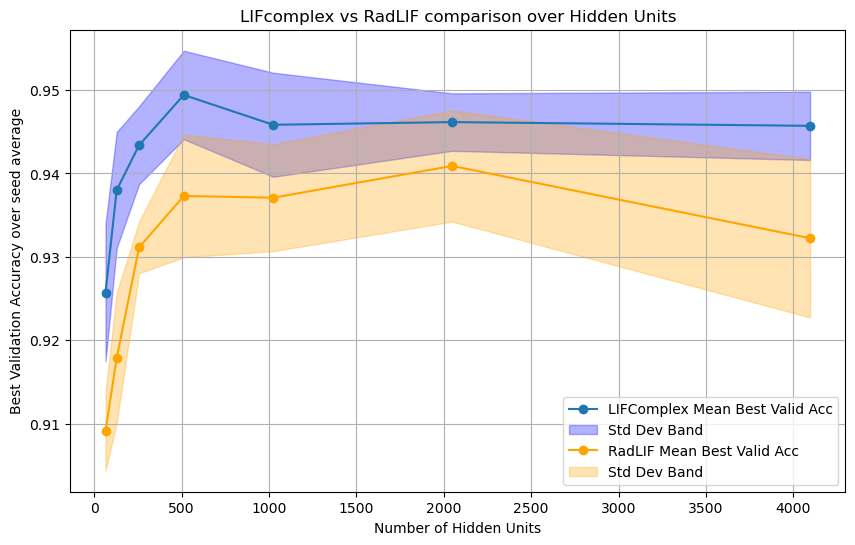

In [78]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df_final[X_axis], df_final['best_valid_acc_mean'], marker='o', label='LIFComplex Mean Best Valid Acc')
plt.fill_between(df_final[X_axis], df_final['lower_band'], df_final['upper_band'], color='b', alpha=0.3, label='Std Dev Band')
plt.plot(df_radlif[X_axis], df_radlif['best_valid_acc_mean'], marker='o', color='orange', label='RadLIF Mean Best Valid Acc')
plt.fill_between(df_radlif[X_axis], df_radlif['lower_band'], df_radlif['upper_band'], color='orange', alpha=0.3, label='Std Dev Band')


# # Annotating the plot with lr, dt_min, dt_max
# for i in range(len(df_final)):
#     n_layers = df_final.loc[i, X_axis]
#     best_valid_acc = df_final.loc[i, 'best_valid_acc']
#     lr = df_final.loc[i, 'lr']
#     dt_min = df_final.loc[i, 'dt_min']
#     dt_max = df_final.loc[i, 'dt_max']
    
#     annotation = f"lr={lr}\ndt_min={dt_min}\ndt_max={dt_max}"
#     plt.annotate(annotation, (n_layers, best_valid_acc), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel(X_axis_name)
plt.ylabel('Best Validation Accuracy over seed average')
plt.title('LIFcomplex vs RadLIF comparison over Hidden Units')
plt.grid(True)
plt.legend()
plt.show()